# Download Dataset From Kaggle
[Kaggle Dataset Link](https://www.kaggle.com/datasets/wwymak/architecture-dataset)<br>
Originally from paper: [Architectural Style Classification Using Multinomial Latent Logistic Regression](https://pdfs.semanticscholar.org/0ed0/eb02de7579c714236c480f06faf239f3cd95.pdf)

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! kaggle datasets download -d wwymak/architecture-dataset

100% 1.43G/1.43G [00:53<00:00, 20.7MB/s]
100% 1.43G/1.43G [00:53<00:00, 28.7MB/s]


In [ ]:
! unzip "architecture-dataset"

# Load dataset

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [5]:
fpath = './arcDataset'
IMG_SIZE = 256
transformations = transforms.Compose([transforms.Resize((IMG_SIZE, IMG_SIZE)),\
                                      transforms.ToTensor()]
                                     )

image_dataset = datasets.ImageFolder(fpath, transform=transformations)

In [15]:
# Define the split ratios (70% train, 15% validation, 15% test)
total_count = len(image_dataset)
train_count = int(0.7 * total_count)
valid_count = int(0.15 * total_count)
test_count = total_count - train_count - valid_count

# Split the dataset
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(
    image_dataset, (train_count, valid_count, test_count)
)

In [18]:
# Create data loaders
BATCH_SIZE = 32
NUM_WORKER = 2
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKER)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKER)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKER)

In [14]:
class_names = {idx: cls for cls, idx in image_loader.dataset.class_to_idx.items()}
classes = image_loader.dataset.classes
print(f'Batch Size: {image_loader.batch_size}')
print(f'Images Count (per batch): {len(image_loader)}')
print(f'Total Images Count: {len(image_loader.dataset)}')
print(f'Total Classes: {len(classes)}')
classes

Batch Size: 32
Images Count (per batch): 150
Total Images Count: 4794
Total Classes: 25


['Achaemenid architecture',
 'American Foursquare architecture',
 'American craftsman style',
 'Ancient Egyptian architecture',
 'Art Deco architecture',
 'Art Nouveau architecture',
 'Baroque architecture',
 'Bauhaus architecture',
 'Beaux-Arts architecture',
 'Byzantine architecture',
 'Chicago school architecture',
 'Colonial architecture',
 'Deconstructivism',
 'Edwardian architecture',
 'Georgian architecture',
 'Gothic architecture',
 'Greek Revival architecture',
 'International style',
 'Novelty architecture',
 'Palladian architecture',
 'Postmodern architecture',
 'Queen Anne architecture',
 'Romanesque architecture',
 'Russian Revival architecture',
 'Tudor Revival architecture']

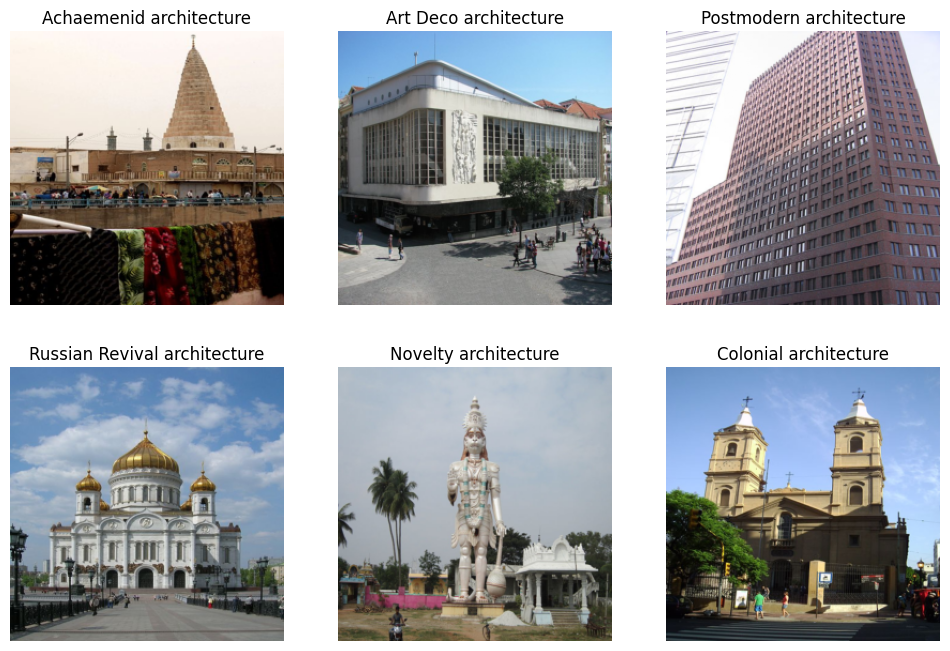

In [24]:
figure = plt.figure(figsize=(12, 8))
num_of_images = 6
images, labels = next(iter(train_loader))

for i in range(1, num_of_images + 1):
    index = int(torch.randint(low=0, high=len(images), size=(1,))[0])
    plt.subplot(2, 3, i)
    plt.axis('off')
    plt.imshow(images[index].permute(1, 2, 0))
    plt.title(f'{classes[labels[index]]}')

In [20]:
# Calculate the number of images per class
def count_images_per_class(loader):
    class_counts = {class_name: 0 for class_name in class_names}
    for _, labels in loader:
        for label in labels:
            class_name = class_names[label.item()]
            class_counts[class_name] += 1
    return class_counts

train_class_counts = count_images_per_class(train_loader)
valid_class_counts = count_images_per_class(valid_loader)
test_class_counts = count_images_per_class(test_loader)

# Print the results
print("Training Loader:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nValidation Loader:")
for class_name, count in valid_class_counts.items():
    print(f"{class_name}: {count} images")

print("\nTest Loader:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count} images")

KeyError: 'Colonial architecture'